In [1]:
import pandas as pd
import wrangle
import new_wrangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# acquire data

In [2]:
df1= wrangle.acquire_data()

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 553.0+ KB


In [4]:
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,A,151315
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,A,151315
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,A,151315
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,A,151315
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,B,118221
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,B,118221
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,B,118221
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,B,118221


In [5]:
df1[df1['Store'] == 3]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
286,3,05-02-2010,461622.22,0,45.71,2.572,214.424881,7.368,B,37392
287,3,12-02-2010,420728.96,1,47.93,2.548,214.574792,7.368,B,37392
288,3,19-02-2010,421642.19,0,47.07,2.514,214.619887,7.368,B,37392
289,3,26-02-2010,407204.86,0,52.05,2.561,214.647513,7.368,B,37392
290,3,05-03-2010,415202.04,0,53.04,2.625,214.675139,7.368,B,37392
...,...,...,...,...,...,...,...,...,...,...
424,3,28-09-2012,389813.02,0,77.46,3.666,226.518093,6.334,B,37392
425,3,05-10-2012,443557.65,0,72.74,3.617,226.721036,6.034,B,37392
426,3,12-10-2012,410804.39,0,70.31,3.601,226.923979,6.034,B,37392
427,3,19-10-2012,424513.08,0,73.44,3.594,226.968844,6.034,B,37392


# Ouliers store_size

We are exploring the store_type vs store_size, we notice that there are outliers

<AxesSubplot:xlabel='Type', ylabel='Size'>

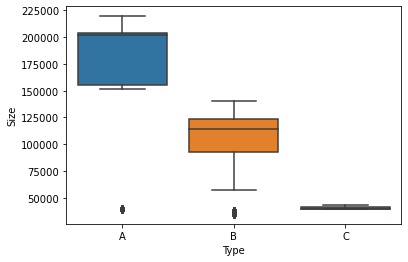

In [6]:
sns.boxplot(x= df1['Type'], y= df1['Size'])

(0.0, 46000.0)

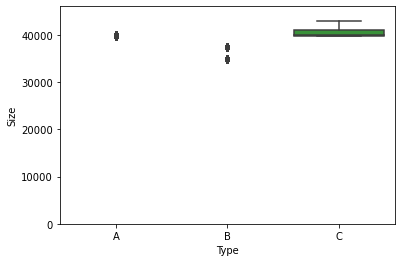

In [7]:
#check only the outliers
sns.boxplot(x= df1['Type'], y= df1['Size'])
plt.ylim(0,46000)

we can see there are outliers for B and A and we decided to change those stores to C

In [8]:
#getting a df that has all store_size < 50000 and df.store_type != "C"
df3 = df1 [(df1.Size < 50000) & (df1.Type != "C")]

In [9]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "A"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
33,143,143,143,143,143,143,143,143,143
36,143,143,143,143,143,143,143,143,143


In [10]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "B"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
3,143,143,143,143,143,143,143,143,143
5,143,143,143,143,143,143,143,143,143


# Wrangle

In [11]:
df= new_wrangle.wrangle_walmart()

/Users/cindyvillanueva/Desktop/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_week'] = pd.DatetimeIndex(df['Date']).week


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         6435 non-null   int64  
 1   weekly_sales     6435 non-null   float64
 2   holiday_flag     6435 non-null   int64  
 3   temperature      6435 non-null   int64  
 4   fuel_price       6435 non-null   float64
 5   CPI              6435 non-null   float64
 6   unemployment     6435 non-null   float64
 7   store_type       6435 non-null   object 
 8   store_size       6435 non-null   int64  
 9   month            6435 non-null   object 
 10  year             6435 non-null   int64  
 11  quarter          6435 non-null   int64  
 12  weekday          6435 non-null   object 
 13  week_of_week     6435 non-null   int64  
 14  deflated_series  6435 non-null   float64
 15  sales_delta      6435 non-null   float64
 16  gas_delta        6435 non-null   float64
 

In [13]:
df.head()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_week,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,2010,1,Friday,5,7786.46,0.0,0.0,Winter,no_holiday
2010-02-05,10,2193048.75,0,54,2.96,126.442,9.765,B,126512,February,2010,1,Friday,5,17344.31,0.0,0.0,Winter,no_holiday
2010-02-05,37,536006.73,0,45,2.57,209.853,8.554,C,39910,February,2010,1,Friday,5,2554.20,0.0,0.0,Winter,no_holiday
2010-02-05,17,789036.02,0,23,2.67,126.442,6.548,B,93188,February,2010,1,Friday,5,6240.30,0.0,0.0,Winter,no_holiday
2010-02-05,30,465108.52,0,39,2.57,210.753,8.324,C,42988,February,2010,1,Friday,5,2206.89,0.0,0.0,Winter,no_holiday


In [14]:
 pd.to_datetime(df['year'], format='%Y')

Date
2010-02-05   2010-01-01
2010-02-05   2010-01-01
2010-02-05   2010-01-01
2010-02-05   2010-01-01
2010-02-05   2010-01-01
                ...    
2012-10-26   2012-01-01
2012-10-26   2012-01-01
2012-10-26   2012-01-01
2012-10-26   2012-01-01
2012-10-26   2012-01-01
Name: year, Length: 6435, dtype: datetime64[ns]

In [15]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    plt.figure
    plt.style.use("ggplot")
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col],color ='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Number of Weeks ')
            plt.xticks(rotation=45)
            plt.ticklabel_format(style = 'plain')
            
            plt.show()

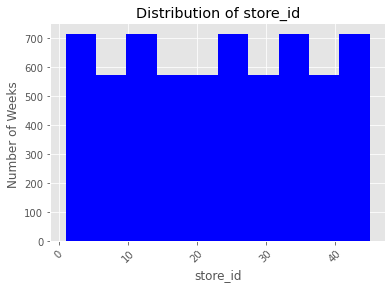

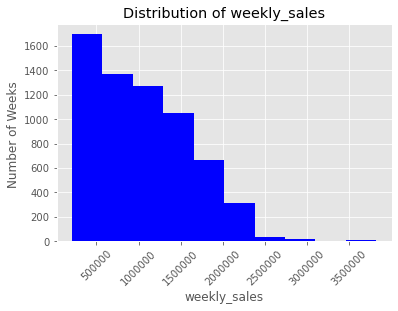

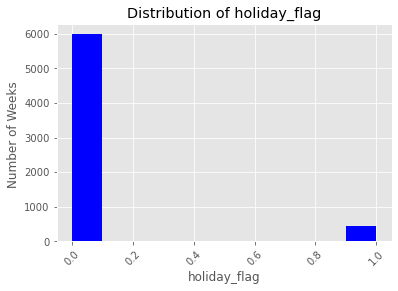

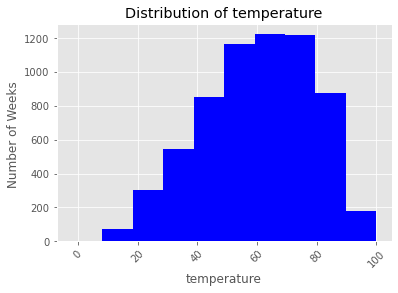

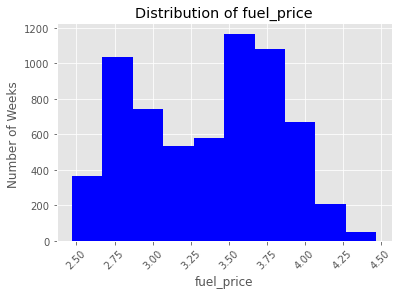

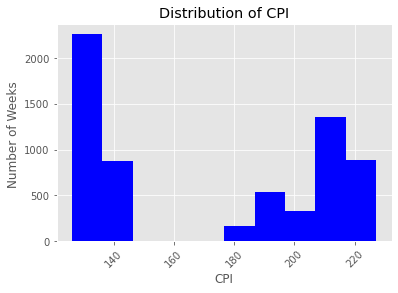

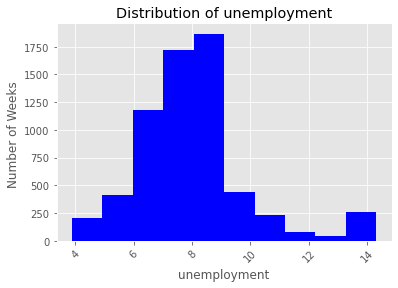

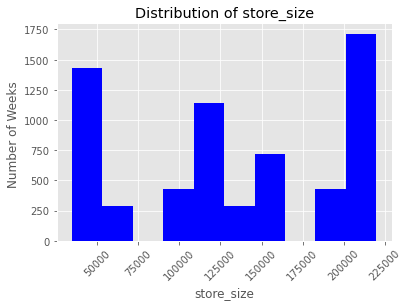

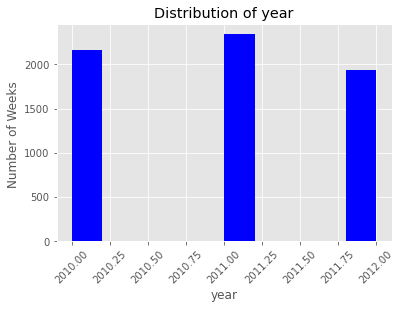

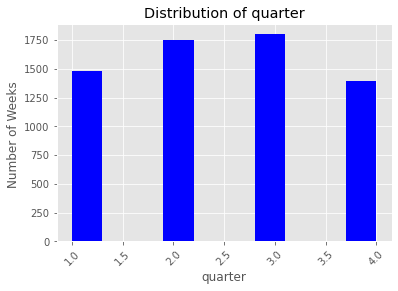

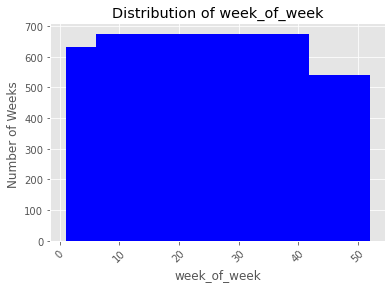

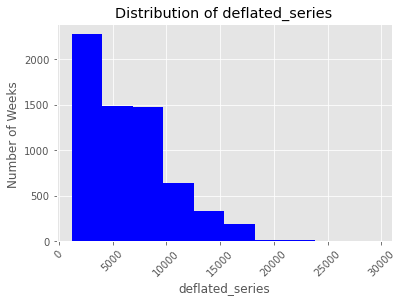

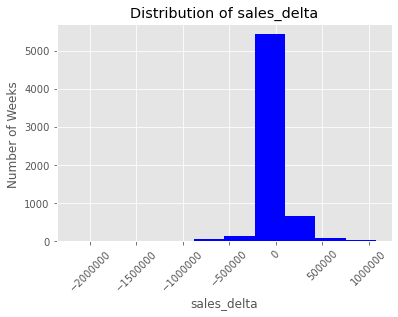

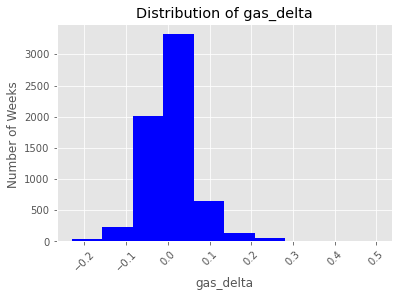

In [16]:
distribution(df)

In [17]:
df.groupby('store_type').mean()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_size,year,quarter,week_of_week,deflated_series,sales_delta,gas_delta
store_type,,,,,,,,,,,,,,
A,21.000000,1.482672e+06,0.06993,59.239161,3.340094,174.757753,7.765653,190992.5,2010.965035,2.482517,25.818182,8906.690283,-978.989969,0.007297
B,20.266667,8.846799e+05,0.06993,55.589744,3.399310,161.490490,8.075424,109865.0,2010.965035,2.482517,25.818182,5982.302406,-541.140233,0.007837
C,31.100000,4.189779e+05,0.06993,68.887413,3.334636,180.351532,8.351736,39511.7,2010.965035,2.482517,25.818182,2423.983427,-172.004965,0.007524


Store type:  A


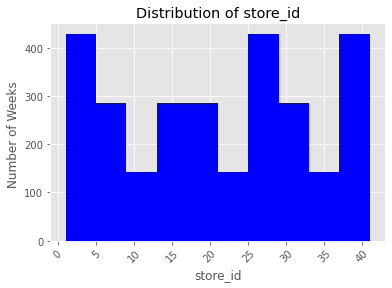

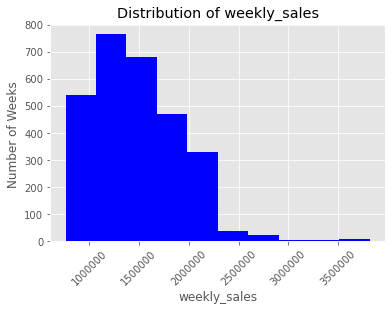

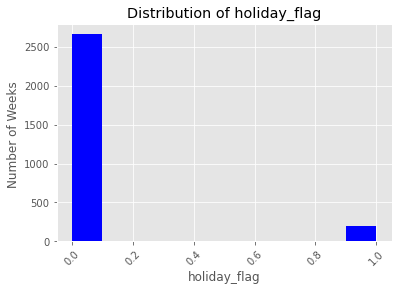

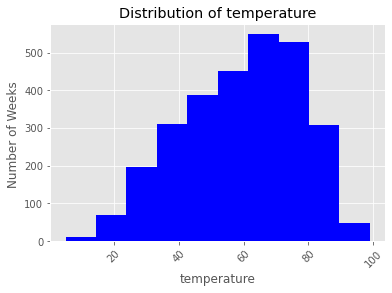

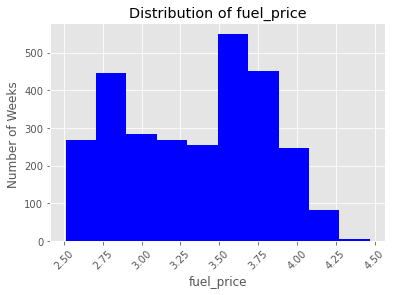

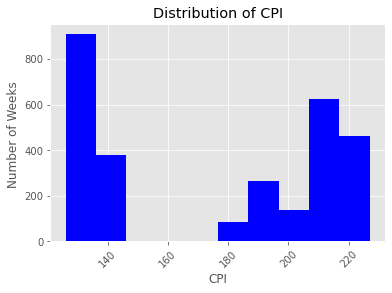

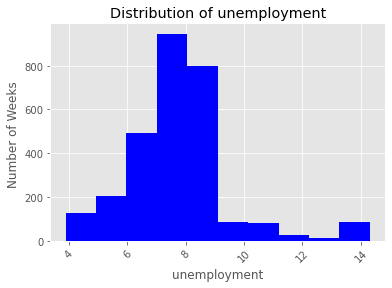

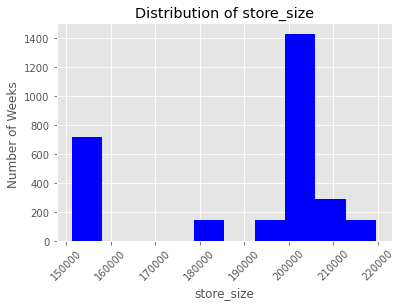

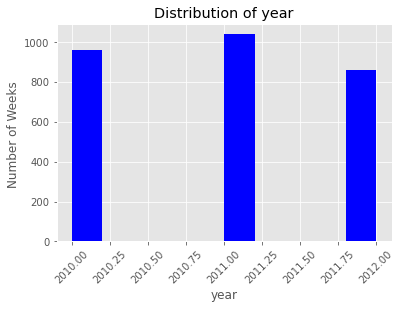

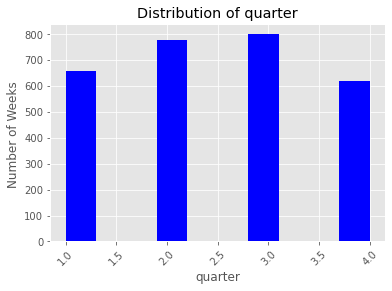

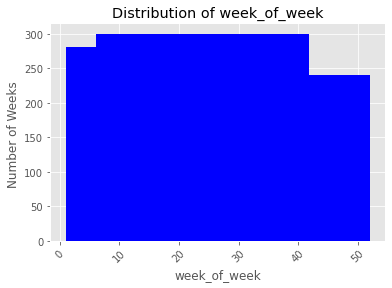

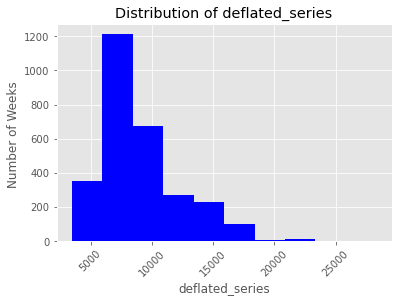

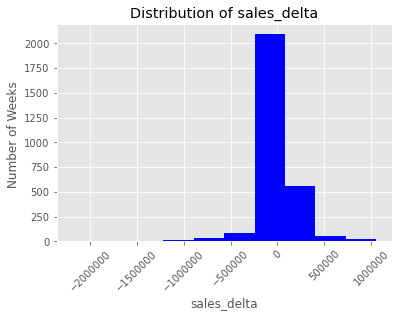

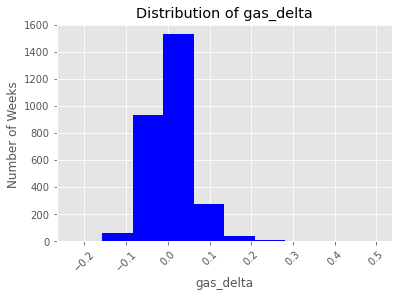

Store type:  B


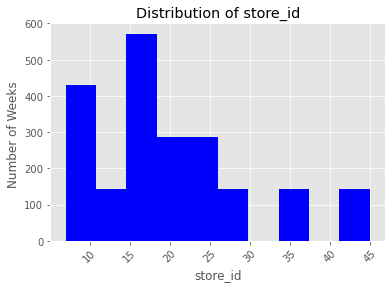

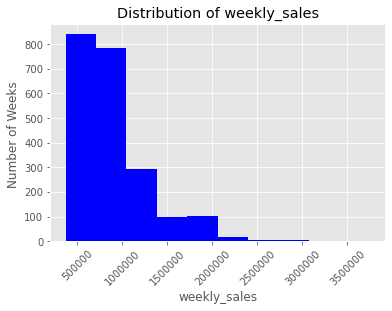

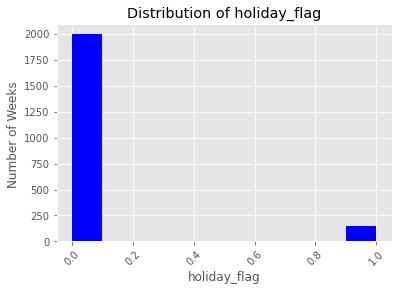

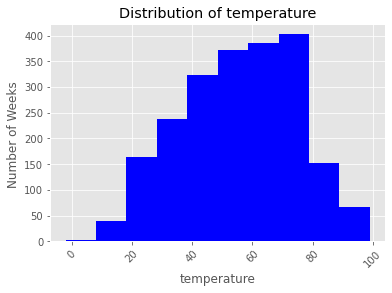

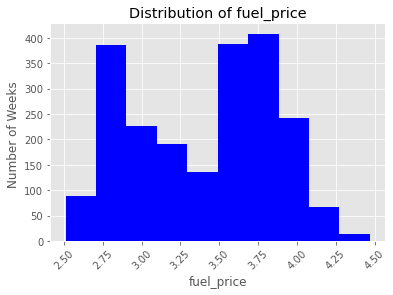

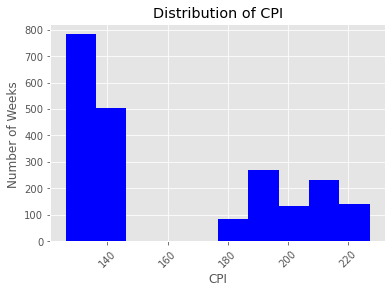

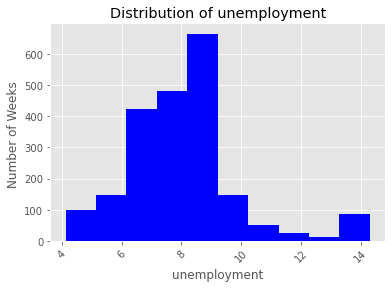

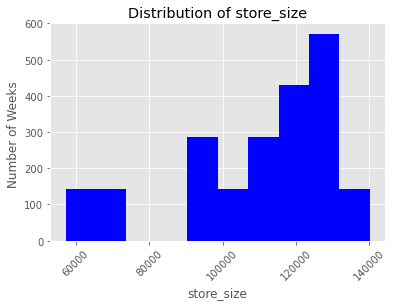

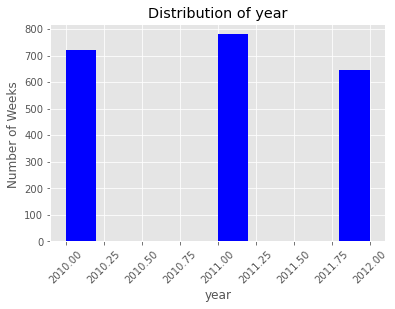

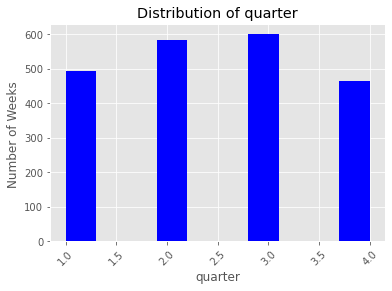

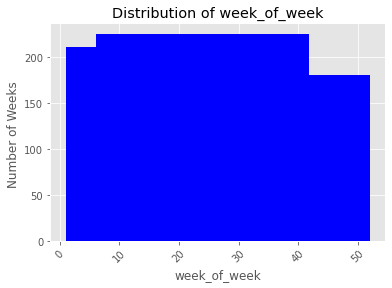

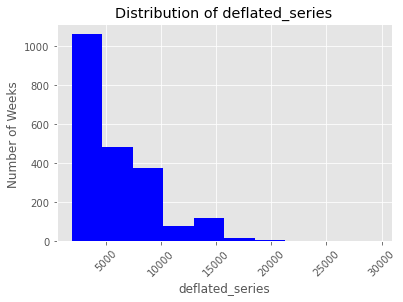

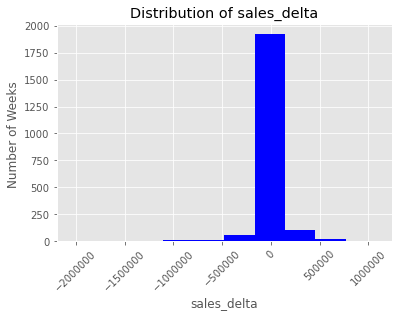

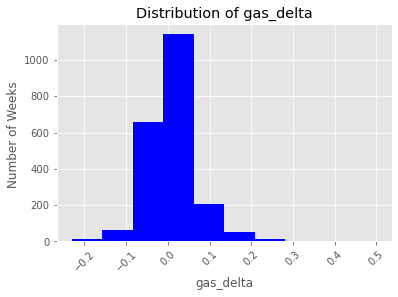

Store type:  C


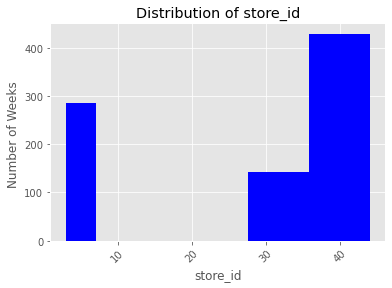

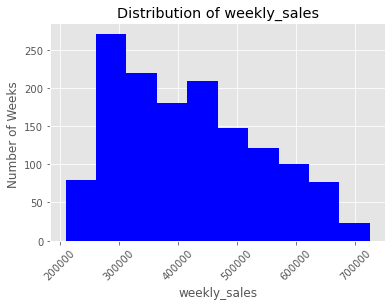

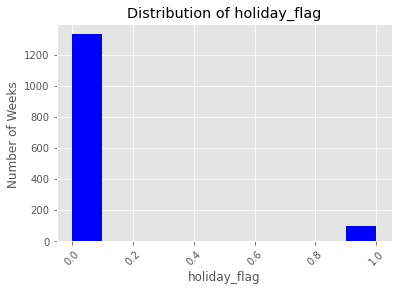

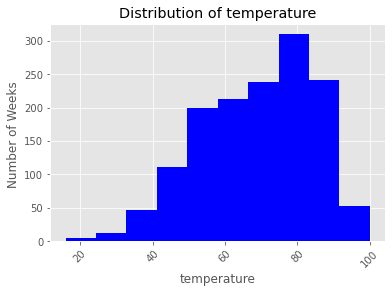

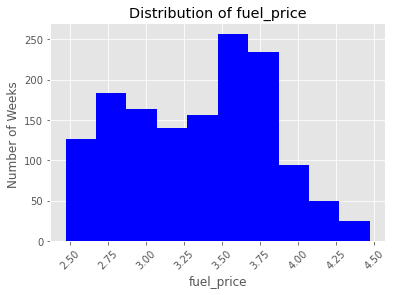

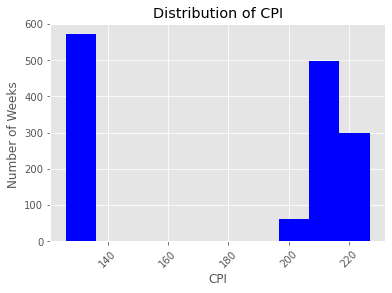

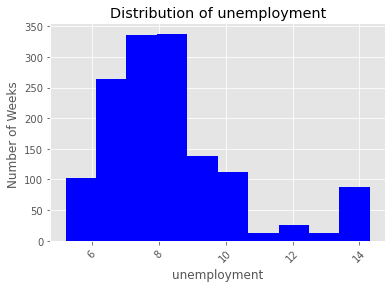

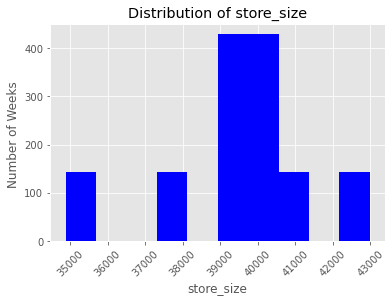

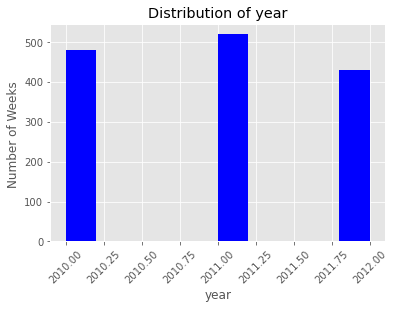

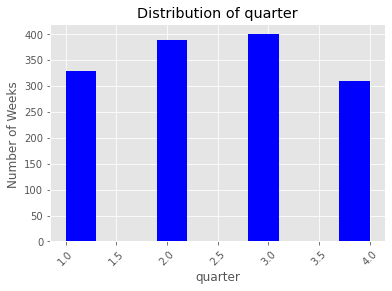

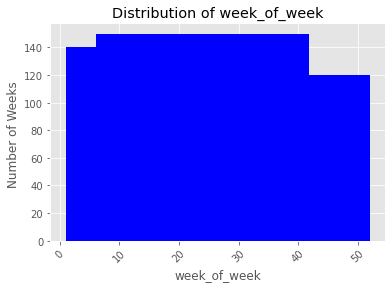

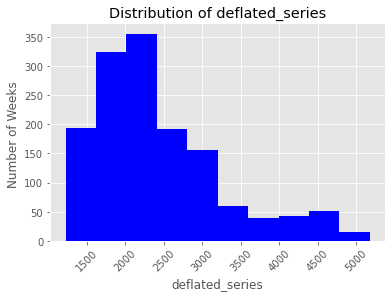

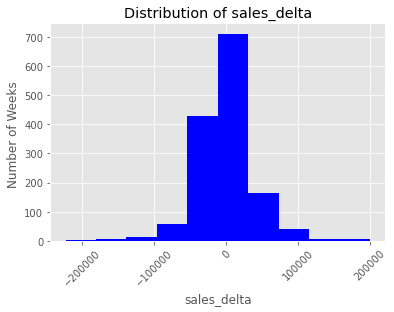

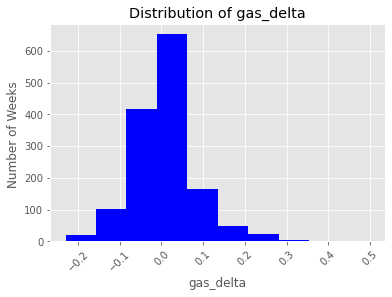

In [18]:
store_type = ["A", "B", "C"]
for store in store_type:
    print("Store type: ", store)
    distribution(df[df.store_type == store])
    

In [19]:
len(df[df.store_type == 'C'].store_id.value_counts())

10

In [20]:
df[df.store_type == 'C'].store_size.value_counts()

39910    429
39690    429
42988    143
37392    143
41062    143
34875    143
Name: store_size, dtype: int64

In [21]:
df[df.store_type == 'B'].store_size.value_counts().sort_index()

57197     143
70713     143
93188     143
93638     143
103681    143
112238    143
114533    143
118221    143
119557    143
120653    143
123737    143
125833    143
126512    143
128107    143
140167    143
Name: store_size, dtype: int64

In [22]:
len(df[df.store_type == 'B'].store_id.value_counts().sort_index())

15

In [23]:
df[df.store_type == 'A'].store_size.value_counts().sort_index()

151315    143
152513    143
155078    143
155083    143
158114    143
184109    143
196321    143
200898    143
202307    143
202505    143
203007    143
203742    143
203750    143
203819    286
204184    143
205863    143
206302    143
207499    143
219622    143
Name: store_size, dtype: int64

In [24]:
len(df[df.store_type == 'A'].store_id.value_counts().sort_index())

20

In [25]:
#finding nulls after creating new columns

In [26]:
df.isnull().sum()

store_id           0
weekly_sales       0
holiday_flag       0
temperature        0
fuel_price         0
CPI                0
unemployment       0
store_type         0
store_size         0
month              0
year               0
quarter            0
weekday            0
week_of_week       0
deflated_series    0
sales_delta        0
gas_delta          0
season             0
holiday_name       0
dtype: int64

In [27]:
df.head()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_week,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,2010,1,Friday,5,7786.46,0.0,0.0,Winter,no_holiday
2010-02-05,10,2193048.75,0,54,2.96,126.442,9.765,B,126512,February,2010,1,Friday,5,17344.31,0.0,0.0,Winter,no_holiday
2010-02-05,37,536006.73,0,45,2.57,209.853,8.554,C,39910,February,2010,1,Friday,5,2554.20,0.0,0.0,Winter,no_holiday
2010-02-05,17,789036.02,0,23,2.67,126.442,6.548,B,93188,February,2010,1,Friday,5,6240.30,0.0,0.0,Winter,no_holiday
2010-02-05,30,465108.52,0,39,2.57,210.753,8.324,C,42988,February,2010,1,Friday,5,2206.89,0.0,0.0,Winter,no_holiday


# dummies 

In [ ]:
#we are going to create dummies for :
- Holiday_name
- Seasons
- Store type
- Month

In [35]:
dumm_col = ['holiday_name', 'season', 'store_type', 'month']

In [40]:
#create dummy variables of the species name
for col in dumm_col:
    #create dummies
    df_dummies = pd.get_dummies(df[col], dummy_na=False)
    #  concat dummy_df with my df
    df = pd.concat([df, df_dummies], axis =1)


In [45]:
#drop no holiday
df = df.drop(columns = ['no_holiday'])

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,...,0,1,0,0,0,0,0,0,0,0
2010-02-05,10,2193048.75,0,54,2.96,126.442,9.765,B,126512,February,...,0,1,0,0,0,0,0,0,0,0
2010-02-05,37,536006.73,0,45,2.57,209.853,8.554,C,39910,February,...,0,1,0,0,0,0,0,0,0,0
2010-02-05,17,789036.02,0,23,2.67,126.442,6.548,B,93188,February,...,0,1,0,0,0,0,0,0,0,0
2010-02-05,30,465108.52,0,39,2.57,210.753,8.324,C,42988,February,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,25,688940.94,0,56,3.88,216.152,7.293,B,128107,October,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,5,319550.77,0,71,3.51,224.038,5.422,C,34875,October,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,40,921264.52,0,49,3.92,138.728,4.145,A,155083,October,...,0,0,0,0,0,0,0,0,1,0
